In [1]:
%matplotlib inline

Extract custom features
=======================

This example shows how to extract features from the tissue image using a
custom function.

The custom feature calculation function can be any python function that
takes an image as input, and returns a list of features. Here, we show a
simple example by defining a function to calculate the mean of the
images.

Custom features are calculated by using `features = 'custom'`, which
calls `squidpy.im.ImageContainer.features_custom`. In addition to
`feature_name` and `channels` we can specify the following
`features_kwargs`:

> -   `func` - custom feature extraction function.
> -   `additional_layers` - names of image layers that should be passed
>     to `func` together with `layer`.
> -   additional keyword arguments for `func`.

::: {.seealso}
See `sphx_glr_auto_examples_image_compute_features.py` for general usage
of `squidpy.im.calculate_image_features`.
:::


In [3]:
import squidpy as sq

Let\'s load the H&E Visium dataset.


In [4]:
# get spatial dataset including high-resolution tissue image
img = sq.datasets.visium_hne_image_crop()
adata = sq.datasets.visium_hne_adata_crop()

  0%|          | 0.00/89.9M [00:00<?, ?B/s]

Define a custom feature extraction function.


In [5]:
def mean_fn(arr):
    """Compute mean of arr."""
    import numpy as np

    return np.mean(arr)

Now we can extract features using [mean\_fn]{.title-ref} by providing it
within `features_kwargs`.


In [6]:
sq.im.calculate_image_features(
    adata,
    img,
    features="custom",
    features_kwargs={"custom": {"func": mean_fn}},
    key_added="custom_features",
    show_progress_bar=False,
)

The result is stored in `adata.obsm['custom_features']`.


In [7]:
adata.obsm["custom_features"].head()

,mean_fn_0
AAAGACCCAAGTCGCG-1,101.868998
AAAGGGATGTAGCAAG-1,102.959180
AAAGTCACTGATGTAA-1,107.924715
AAATGGCATGTCTTGT-1,97.444851
AAATGGTCAATGTGCC-1,102.854690


Use `squidpy.pl.extract` to plot the histogram features on the tissue
image or have a look at [our interactive visualization
tutorial](../../tutorials/tutorial_napari.ipynb) to learn how to use our
interactive `napari` plugin.


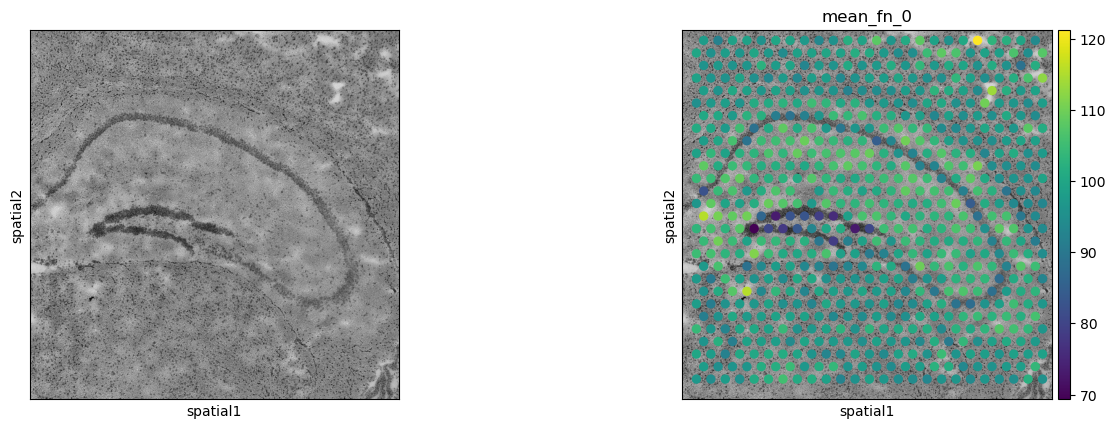

In [8]:
sq.pl.spatial_scatter(sq.pl.extract(adata, "custom_features"), color=[None, "mean_fn_0"], img_cmap="gray")

You can also pass more than one image layer to the custom feature
extraction function. For this, specify the necessary additional layer
names using `additional_layers` in `features_kwargs`. The specified
image layers will be passed to the custom feature extraction function.

Here, we show this behavior by defining a feature extraction function
that sums two image layers:


In [9]:
def sum_fn(arr, extra_layer):
    """Compute sum of two image layers."""
    import numpy as np

    return np.sum(arr + extra_layer)


img.add_img(img["image"].values, layer="extra_layer")

sq.im.calculate_image_features(
    adata,
    img,
    layer="image",
    features="custom",
    features_kwargs={"custom": {"func": sum_fn, "additional_layers": ["extra_layer"]}},
    key_added="custom_features",
    show_progress_bar=False,
)